![MSE Logo](https://moodle.msengineering.ch/pluginfile.php/1/core_admin/logo/0x150/1643104191/logo-mse.png)

# AdvNLP Lab 1: Text Segmentation with NLTK

## 1. Introduction
The goal of the first AdvNLP lab is to run simple operations for text analysis using the [NLTK](http://www.nltk.org/) toolkit.  You will use the environment that you set up following the instructions of the previous notebook: [Python 3](https://www.python.org/) with [Jupyter](https://jupyter.org/) notebooks.  

You will use NLTK functions to get texts from the web and segment (split) them into sentences and words (also called *tokens*).  You will also experiment with extracting statistics about the texts.  In the end, you will compare statistics of texts in two languages. 

To submit your practical work, please execute anew all cells of this notebook, then save it and submit it as homework on Moodle.

**NLTK: the Natural Language (Processing) Toolkit**

Please add NLTK to your Python installation, by following the installation instructions at the [NLTK website](http://www.nltk.org/install.html).  A good way to get started is to look at [Chapter 1](http://www.nltk.org/book/ch01.html) of the [NLTK book (NLP with Python)](http://www.nltk.org/book/) and to try some of the instructions there.  

The online edition is updated for Python 3, but the printed book, also available in PDF on some websites, is only for Python 2 ([Natural Language Processing with Python: Analyzing Text with the Natural Language Toolkit, Steven Bird, Ewan Klein, and Edward Loper, O'Reilly Media, 2009](http://shop.oreilly.com/product/9780596516499.do)). 

To use NLTK in Jupyter, all you need is to `import nltk` before you need it.  You must use the prefix `nltk.` unless you write for instance: `from nltk.book import *` which will import and define several text collections (a.k.a corpora).  NLTK can download from the associated website a large number of corpora.  NLTK has a download manager which can be called from a Python interpreter (not a notebook) using `nltk.download()`.  In this practical session, we will not use any of these.

In [4]:
import nltk
from nltk import bigrams
from regex import split
from soupsieve.util import lower

nltk.download('punkt') # execute only once after installing NLTK

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\quent\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**1a.** To verify your NLTK library, please define an *array* of words called `sentence1` and use `nltk.bigrams` to generate all bigrams from it, i.e. pairs of consecutive words, sorted alphabetically.  You can see an example in [Sec. 3.3 of Ch. 1 of the NLTK book](http://www.nltk.org/book/ch01.html#collocations-and-bigrams). 

In [12]:
sentence1 =["I","do","this","lab","on","thursday"]
sentence1 = [x.lower() for x in sentence1]
print(list(bigrams(sorted(sentence1))))

[('do', 'i'), ('i', 'lab'), ('lab', 'on'), ('on', 'this'), ('this', 'thursday')]


## 2. Using NLTK to tokenize a text

**2a.** Using inspiration from [Chapter 3 (3.1. Processing Raw Text) of the NLTK book](http://www.nltk.org/book/ch03.html), get a book from the Gutenberg Project in text format.   What is its length? Are these bytes or characters? If you are curious about "special" characters, you can refer to [Python's documentation of Unicode support](https://docs.python.org/3.8/howto/unicode.html).

In [13]:
from urllib import request # you may need to run:  !pip install urllib

In [15]:
# Please write your Python code below and execute it.
url = "https://www.gutenberg.org/cache/epub/49813/pg49813.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')
type(raw)
len(raw)


58782

In [17]:
print("char: ",len(raw))
#as the text is in french, they may use multi byte long character
print("byte: ",len(raw.encode('utf-8')),"difference byte vs char :",len(raw.encode('utf-8'))-len(raw))

char:  58782
byte:  59754 difference byte vs char : 972


**2b.** We now want to keep only the meaningful text from the book, without the header and the final license. Determine, either by spotting the position of certain initial and final strings, or by trial and error, how much your should trim from the beginning and from the end in order to keep only the actual text of the book. Then save the result into a new string, and display its length.

In [30]:
# Please write your Python code below and execute it.
clair_dune = raw.split("***")[2]
print("char: ",len(clair_dune))

char:  38905


NLTK has two useful functions, one to segment a text into sentences, and the other one to segment a text into words.  Usually, only word segmentation is called *tokenization*, but NLTK uses this name for both functions.

* `nltk.sent_tokenize(...)` (documented [here](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.word_tokenize))
* `nltk.word_tokenize(...)` (documented [here](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.sent_tokenize))

**2c.** Please segment the text above into sentences with NLTK, display the number of sentences, and display five sentences.  Please comment briefly about the quality of the segmentation.  If you think that some special characters degrade the results, please go back and replace them in the full text (e.g. with `.replace('s1', 's2')`).

In [42]:
# Please write your Python code in this cell and execute it.
import nltk
nltk.download('punkt_tab')


De quoi refroidir vos cascades...
Aussi, toute tristesse enfuie,
  Les sables blonds sont repeuplés,
  Tout rit: plus de cœurs endeuillés!


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\quent\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [62]:
indexes=[28,32,48,50,52]
sentences = nltk.tokenize.sent_tokenize(clair_dune, language='french')
choosed_sentences=[sentences[x]for x in indexes ]
print(choosed_sentences)

['De quoi refroidir vos cascades...', "Sut-il, enfin, le bénisseur,\r\n  En son beau geste fait au moule,\r\n  Bénir l'huître noble et sa sœur\r\n  Plus démocratique, la moule?", "Nous, mieux inspirés, ne quittons\r\n  Point notre allègre capitale:\r\n  En l'honneur des bénins piétons\r\n  Sa grâce estivale s'étale.", "La ville à nous seuls, c'est charmant,\r\n  On est chez soi même au théâtre\r\n  Où l'on ne compte plus, vraiment,\r\n  Avec «le public idolâtre».", 'Nous, toujours dispos et bavards,\r\n  Sous les draches rafraîchissantes,\r\n  Nous passons sur les boulevards\r\n  Des heures certes ravissantes.']


**2d.** Please segment each sentence into tokens, store the result in a new variable (a list of lists), and display the same five sentences as above.  Please comment briefly on the quality of the tokenization.

In [64]:
# Please write your Python code in this cell and execute it.

tokens_sentence = [nltk.tokenize.word_tokenize(sentences[x], language='french')for x in range(len(sentences))]
choosed_tokenised_sentences=[tokens_sentence[x]for x in indexes ]
print(choosed_tokenised_sentences)

[['De', 'quoi', 'refroidir', 'vos', 'cascades', '...'], ['Sut-il', ',', 'enfin', ',', 'le', 'bénisseur', ',', 'En', 'son', 'beau', 'geste', 'fait', 'au', 'moule', ',', 'Bénir', "l'huître", 'noble', 'et', 'sa', 'sœur', 'Plus', 'démocratique', ',', 'la', 'moule', '?'], ['Nous', ',', 'mieux', 'inspirés', ',', 'ne', 'quittons', 'Point', 'notre', 'allègre', 'capitale', ':', 'En', "l'honneur", 'des', 'bénins', 'piétons', 'Sa', 'grâce', 'estivale', "s'étale", '.'], ['La', 'ville', 'à', 'nous', 'seuls', ',', "c'est", 'charmant', ',', 'On', 'est', 'chez', 'soi', 'même', 'au', 'théâtre', 'Où', "l'on", 'ne', 'compte', 'plus', ',', 'vraiment', ',', 'Avec', '«', 'le', 'public', 'idolâtre', '»', '.'], ['Nous', ',', 'toujours', 'dispos', 'et', 'bavards', ',', 'Sous', 'les', 'draches', 'rafraîchissantes', ',', 'Nous', 'passons', 'sur', 'les', 'boulevards', 'Des', 'heures', 'certes', 'ravissantes', '.']]


**2e.** Please display the total number of tokens in the final result.

In [71]:
# Please write your Python code in this cell and execute it.
nbr_tokens =0
for sentence in tokens_sentence:
    nbr_tokens+=len(sentence)
print(nbr_tokens)

6792


**2f.** Please tokenize now directly the initial full text, without segmenting it into sentences.  Please display the total number of tokens found, and compare this number with the one obtained above.

In [67]:
# Please write your Python code in this cell and execute it.
tokens =nltk.tokenize.word_tokenize(clair_dune, language='french')
print(len(tokens))

6792


**2g.** Find the size of the vocabulary of your text (the unique *word types*) by converting the list of words (the *tokens*) to a Python `set`.  Note that these *types* include punctuations and other symbols found through tokenization, and that upper/lower case letters are different.  Display all words longer than 15 characters and not containing a hyphen (-).

In [77]:
# Please write your Python code in this cell and execute it.
vocab =set(tokens)
[print(x) for x in vocab if len(x)>15 and not "-" in x]
print(len(vocab))

rafraîchissantes
2542


**2h.** What is the type-token ratio (TTR) of your text?

In [72]:
print(len(vocab)/len(tokens))

0.374263839811543


## 3. Computing statistics with NLTK
In this section, you will create a `nltk.Text` object which will enable you to compute statistics using NLTK functions.  [Chapter 1 of the NLTK book](http://www.nltk.org/book/ch01.html) provides examples of use for such objects.

A `nltk.Text` can store one of the following text formats: (1) string, (2) list of all words (list of strings), (3) list of all sentences (list of lists of strings).  However, only option (2) will allow you to use counting methods.   Note that `nltk.word_tokenize()` and `nltk.sent_tokenize()` apply to strings but not to `ntlk.Text` objects (even when they store a string).

**3a.** Please create a `nltk.Text` object from the tokenized version of your text (without sentence segmentation).

In [80]:
# Please write your Python code in this cell and execute it.
nltk_tokens = nltk.Text(tokens)


NLTK can compute word frequencies for a given text, yielding a new object called a frequency distribution (`FreqDist`): see [Sec. 3.1 of Ch. 1 of the NLTK book](http://www.nltk.org/book/ch01.html#frequency-distributions).  Using such an object, we can get the most frequent words.  

**3b.** Please construct the frequency distribution of your text.  Then, display the words that have at least 4 characters among the 50 most frequent words (calling the `most_common` method on the `FreqDist`), together with their number of occurrences.  Please comment briefly on the results.

In [90]:
# Please write your Python code in this cell and execute it.
freq =nltk.FreqDist(nltk_tokens)
[print(x) for x in freq.most_common(50) if len(x[0])>=4]

('dans', 33)
('plus', 25)
('leurs', 25)
('Dans', 23)
('cœur', 18)
('flot', 17)
('leur', 17)
('sont', 16)
("d'un", 16)


[None, None, None, None, None, None, None, None, None]

## 4. Testing Zipf's law

It has been observed, for large amounts of texts, that when ranking words by decreasing frequencies, the ranks (1, 2, 3, ...) and the numbers of occurrences (say, 948, 321, 146, ...) follow a particular law called [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law).  Specifically, if *x&nbsp;* are the ranks and *y&nbsp;* the corresponding numbers of occurrences, their relation is approximately *y = a / x^b* for appropriate values of *a* and *b*.  If plotted in log-log coordinates, such a relation results in a linear plot (log(*y*) = *a* - *b* log(*x*)).

**4a.** Using the `FreqDist` object, please collect the frequencies of the 1000 most frequent words, rank them by decreasing values, and plot the (rank, frequency) curve on a log-log scale (simply using the `.xscale("log")` parameter of the plot).

In [92]:
# Before using matplotlib to display graphs inline, you must execute 
# the following two lines (assuming you have installed the library).
import matplotlib.pyplot as plt
%matplotlib inline

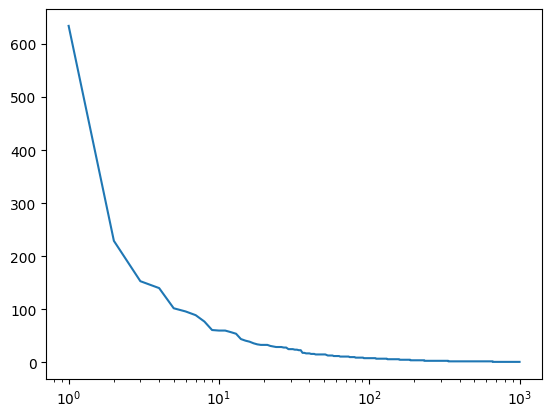

In [129]:
# Please write your Python code in this cell and execute it.
mostcommon1000 = freq.most_common(1000)
x = [i+1 for i in range(len(mostcommon1000))]  
y = [item[1] for item in mostcommon1000]  
plt.plot(x,y)
plt.xscale('log')

**4b.** Please try to find manually the best values of a and b, so that the curve *y = a / x^b* (in other words (*x*, *a / x^b*)) matches as closely as possible the (frequency, rank) curve on the log-log scale.  You can use a trial-and-error approach, starting e.g. from *a* = 1000 and *b* = 1 (these values depend on the text that you tokenized).  Please display both curves on the same graph below to show how close they are. 

In [136]:
print(pow(1,2))

1


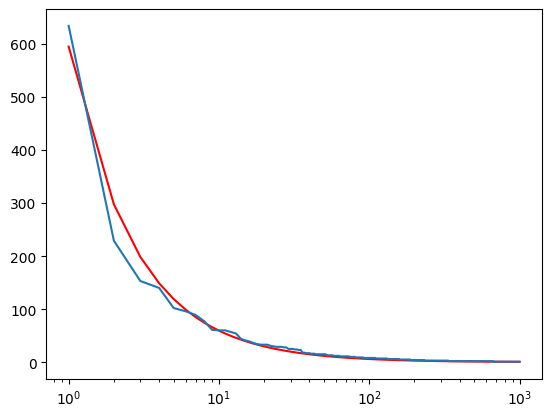

In [144]:
# Please write your Python code in this cell and execute it.
b = 595
a=1.0
def f(x,a,b):
    return b/pow(x,a)
y_guess = [ f(x,a,b)for x in x]
plt.plot(x,y_guess,color="red")
plt.plot(x,y)
plt.xscale('log')

**4c.** Please find automatically the best values of a and b using `scipy.optimize.curve_fit()`.  The best values are those leading to the closest fitting line (by default according to least squares).

In [124]:
import numpy as np 
import scipy

In [141]:
# Please write your Python code in this cell and execute it.

    
scipy.optimize.curve_fit(f,xdata=x,ydata=y)

(array([  1.01192673, 595.16679377]),
 array([[2.19549727e-05, 7.13001615e-03],
        [7.13001615e-03, 8.63093951e+00]]))

## 5.  Does an undeciphered manuscript obey Zipf's law?

The Voynich manuscript is an undeciphered manuscript from the 15th century: its script and language are still unknown, and it is not impossible that it is a hoax.  You can read about it [on Wikipedia](https://en.wikipedia.org/wiki/Voynich_manuscript) or even [on a dedicated website](http://www.voynich.nu/), which provides pictures and transcriptions.  A version of it converted to ASCII characters, one word per line, is made available on Moodle as the `voynich.txt` file (all characters correspond to symbols found in the manuscript).

**5a.** Please compute the number of tokens, the number of types, and the type-to-token ration (TTR) for this document.  How does it compare with your previous text?

In [150]:
# Please write your Python code in this cell and execute it.
with open("lab1/voynich.txt", "r") as file:
    voynich_tokens = [line.strip() for line in file]
vocab_voynich = set(voynich_tokens)
print("nbr tokens :",len(voynich_tokens), " nbr different tokens :",len(vocab_voynich))
print("ratio :",len(vocab_voynich)/len(voynich_tokens))

nbr tokens : 21029  nbr different tokens : 5674
ratio : 0.26981787055970324


**5b.** Please examine if the tokens in the Voynich manuscript follow Zipf's law.  Specifically, please draw the (_rank_, _frequency_) curve in log-log scale for the 100 most frequent tokens, along with the closest (*x*, *a* / *x^b*) curve, and indicate the best values of *a* and *b*.

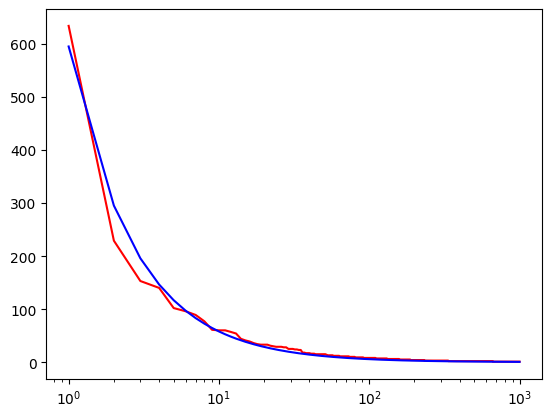

In [155]:
# Please write your Python code in this cell and execute it.
voynich_mostcommon100 = nltk.FreqDist(voynich_tokens).most_common(100)
x_voy = [i+1 for i in range(len(mostcommon1000))]  
y_voy = [item[1] for item in mostcommon1000]  
plt.plot(x_voy,y_voy,color="red")
bestFit=scipy.optimize.curve_fit(f,xdata=x_voy,ydata=y_voy)
y_guess_voy = [ f(x,bestFit[0][0],bestFit[0][1])for x in x]
plt.plot(x_voy,y_guess_voy,color="blue")
plt.xscale('log')

**5c.** What are your conclusions regarding Voynich's manuscript?  Is it likely to be similar to a real text in an unknown language?  In your answer, consider the values of TTR, the two parameters *a* and *b*, and the fitting of the *y = a / x^b* curve.

## End of AdvNLP Lab 1
Please cleand and save the completed notebook, and upload it to Moodle.